In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  # Label 0 for benign
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) # Label 1 for malignant


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply augmentation to both benign and malignant images
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 392ms/step - accuracy: 0.3809 - loss: 2.5412 - val_accuracy: 0.4802 - val_loss: 1.0013
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.5355 - loss: 0.9475 - val_accuracy: 0.5989 - val_loss: 0.8201
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6673 - loss: 0.7444 - val_accuracy: 0.7119 - val_loss: 0.6720
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6999 - loss: 0.6869 - val_accuracy: 0.7571 - val_loss: 0.6252
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - accuracy: 0.7292 - loss: 0.5915 - val_accuracy: 0.7062 - val_loss: 0.7017
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.7841 - loss: 0.5255 - val_accuracy: 0.7966 - val_loss: 0.5271
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.8110 - loss: 0.4707 - val_accuracy: 0.6893 - val_loss: 0.6651
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.7754 - loss: 0.5316 - val_accuracy: 0

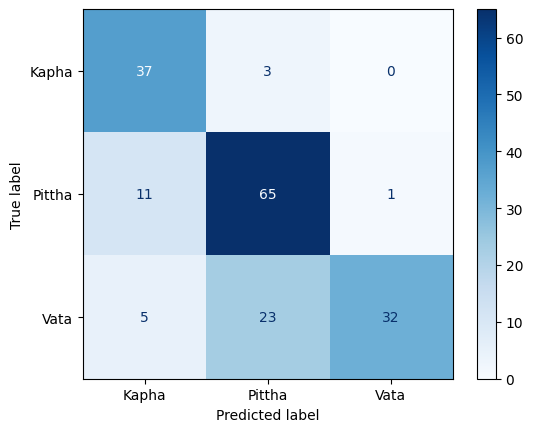

Accuracy: 75.71%


In [3]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of InceptionV3
x = GlobalAveragePooling2D()(base_model.output)  # Use global average pooling instead of flattening
x = Dense(256, activation='relu')(x)  # Dense layer for feature learning
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')


In [4]:
from sklearn.metrics import classification_report

# After predicting with the trained model (using model.predict)
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred_labels))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        40
           1       0.71      0.84      0.77        77
           2       0.97      0.53      0.69        60

    accuracy                           0.76       177
   macro avg       0.79      0.77      0.75       177
weighted avg       0.80      0.76      0.75       177



In [5]:
# Save the model to a file
model.save("inception_best_model.h5")
